In [1]:
# Now we are inside the data directory , where along woth this file there are 4 folders named beauty,sports,toys and yelp

import os
import pickle
import numpy as np
import pandas as pd

def load_pickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f)
    
def load_text(file):
    with open(file, 'r') as f:
        return f.read()
    
# I want to mention a data directory where my data is stored
# data is in ../../Data/data directory
data_dir = "../../../Data/data"



In [2]:
# data_splits = load_pickle('../../Data/data/beauty/rating_splits_augmented.pkl')
# test_review_data = data_splits['test']

# data_splits = load_pickle('../../../Data/data/beauty/rating_splits_augmented.pkl')
# use data_dir now
data_splits = load_pickle(os.path.join(data_dir,'beauty/rating_splits_augmented.pkl'))
train_data = data_splits['train']
valid_data = data_splits['val']
test_data = data_splits['test']

print(len(train_data),len(valid_data),len(test_data))

317516 19850 19850


In [3]:
print(data_splits.keys())

dict_keys(['train', 'val', 'test', 'train_indices', 'val_indices', 'test_indices'])


In [4]:
print(train_data[2])

{'reviewerID': 'A3G6XNM240RMWA', 'asin': '7806397051', 'reviewerName': 'Karen', 'helpful': [0, 1], 'reviewText': "The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use to me but I use at least two of them on a regular basis, and two more occasionally, which is the only reason I'm giving it for stars, I feel like the range of colors is kind of a waste for me, but the  product itself  is wonderful, it's not cakey, gives me a natural for and concealed my imperfections, therefore I highly recommend it :)", 'overall': 4.0, 'summary': 'great quality', 'unixReviewTime': 1378425600, 'reviewTime': '09 6, 2013', 'explanation': 'great quality', 'feature': 'quality'}


In [5]:
# Now i want user item interaction matrix for the train data
# I will create a user item interaction matrix for the train data
# I will create a user item interaction matrix for the valid data
# I will create a user item interaction matrix for the test data

# {'reviewerID': 'A1YJEY40YUW4SE', 'asin': '7806397051', 'reviewerName': 'Andrea', 'helpful': [3, 4], 'reviewText': 'Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.', 'overall': 1.0, 'summary': "Don't waste your money", 'unixReviewTime': 1391040000, 'reviewTime': '01 30, 2014'
# The above is the format of the data
# I will convert this data into user item interaction matrix
def user2item(data):
    user2item = {}
    for d in data:
        user = d['reviewerID']
        item = d['asin']
        if user not in user2item:
            user2item[user] = []
        user2item[user].append(item)
    return user2item

def item2user(data):
    item2user = {}
    for d in data:
        user = d['reviewerID']
        item = d['asin']
        if item not in item2user:
            item2user[item] = []
        item2user[item].append(user)
    return item2user

user2item_train = user2item(train_data)
item2user_train = item2user(train_data)

user2item_valid = user2item(valid_data)
item2user_valid = item2user(valid_data)

user2item_test = user2item(test_data)
item2user_test = item2user(test_data)

print(len(user2item_train),len(item2user_train))


22363 12101


In [6]:
print(user2item_train['A1YJEY40YUW4SE'])

['7806397051', 'B0020YLEYK', 'B002WLWX82', 'B004756YJA', 'B004ZT0SSG', '7806397051', '7806397051', '7806397051', '7806397051', '7806397051', '7806397051', 'B002WLWX82', 'B002WLWX82', 'B002WLWX82', 'B002WLWX82', 'B002WLWX82', 'B002WLWX82', 'B002WLWX82']


In [7]:
# Now calculate the sparisty of the user item interaction matrix
# Sparsity = (Number of missing values)/(Total values)
# Total values = Number of users * Number of items
# Number of missing values = Total values - Number of present values

def sparsity(user2item,item2user):
    total_values = len(user2item)*len(item2user)
    present_values = 0
    for user in user2item:
        present_values += len(user2item[user])
    missing_values = total_values - present_values
    print(total_values,present_values,missing_values)
    sparsity = missing_values/total_values
    return sparsity

sparsity_train = sparsity(user2item_train,item2user_train)
sparsity_valid = sparsity(user2item_valid,item2user_valid)
sparsity_test = sparsity(user2item_test,item2user_test)
print(sparsity_train,sparsity_valid,sparsity_test)

270614663 317516 270297147
89512220 19850 89492370
90230956 19850 90211106
0.9988266858991303 0.9997782425684448 0.99978000898051


Rating distribution in train data {1.0: 59285, 3.0: 54220, 4.0: 49163, 2.0: 58827, 5.0: 96021}
Rating distribution in valid data {4.0: 4091, 5.0: 11339, 1.0: 1067, 3.0: 2191, 2.0: 1162}
Rating distribution in test data {5.0: 11417, 4.0: 3977, 3.0: 2268, 1.0: 1037, 2.0: 1151}


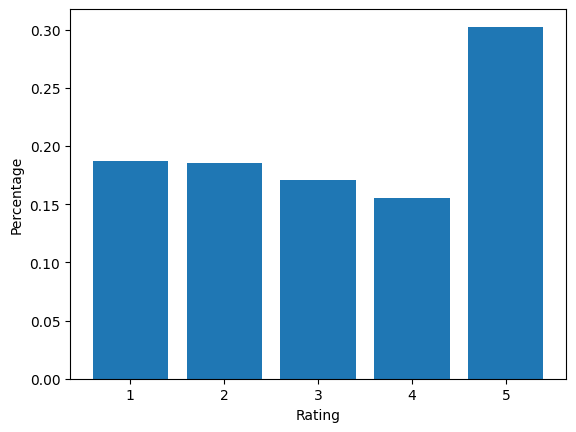

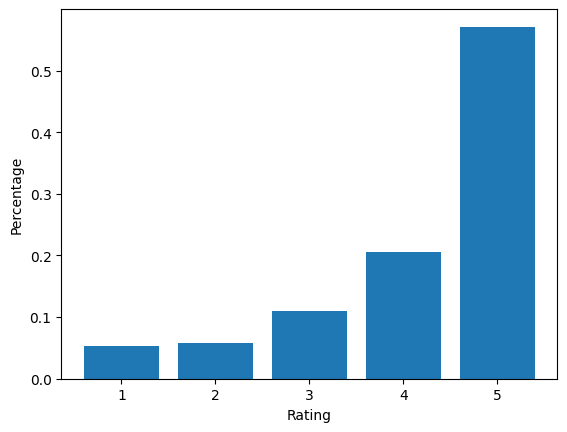

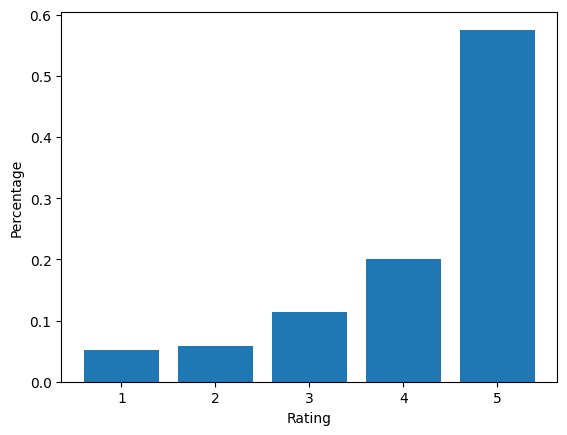

In [8]:
# Now i wanthe distribution of ratings in the train data

def rating_distribution(data):
    rating_dist = {}
    for d in data:
        rating = d['overall']
        if rating not in rating_dist:
            rating_dist[rating] = 0
        rating_dist[rating] += 1
    return rating_dist

rating_dist_train = rating_distribution(train_data)
rating_dist_valid = rating_distribution(valid_data)
rating_dist_test = rating_distribution(test_data)

print(f"Rating distribution in train data {rating_dist_train}")
print(f"Rating distribution in valid data {rating_dist_valid}")
print(f"Rating distribution in test data {rating_dist_test}")

# I want the histogram plot and in plot i wnat to see the percentage of each rating in the data in that corresponding rating and name the x axis as rating and y axis as percentage

import matplotlib.pyplot as plt

def plot_histogram(rating_dist):
    total_ratings = sum(rating_dist.values())
    x = list(rating_dist.keys())
    y = [rating_dist[rating]/total_ratings for rating in x]
    plt.bar(x,y)
    plt.xlabel('Rating')
    plt.ylabel('Percentage')
    plt.show()
    
plot_histogram(rating_dist_train)
plot_histogram(rating_dist_valid)
plot_histogram(rating_dist_test)



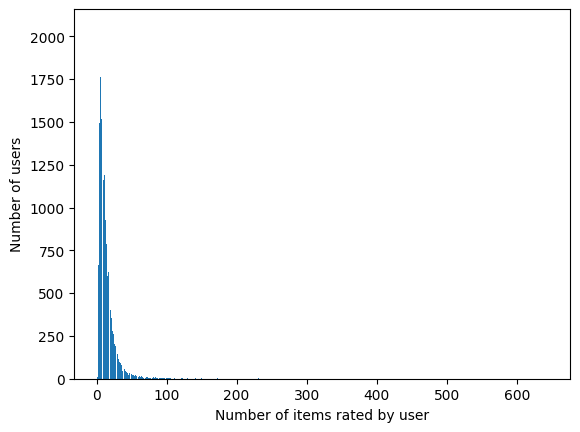

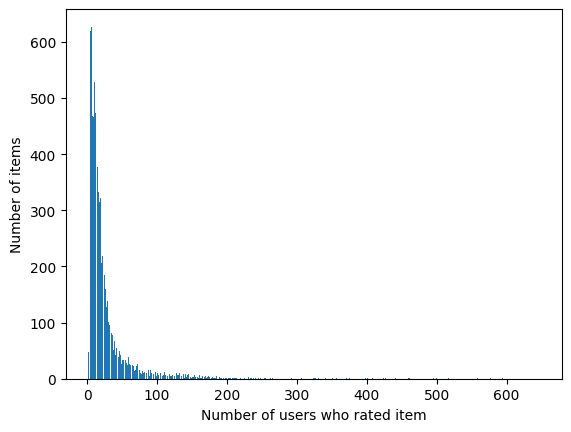

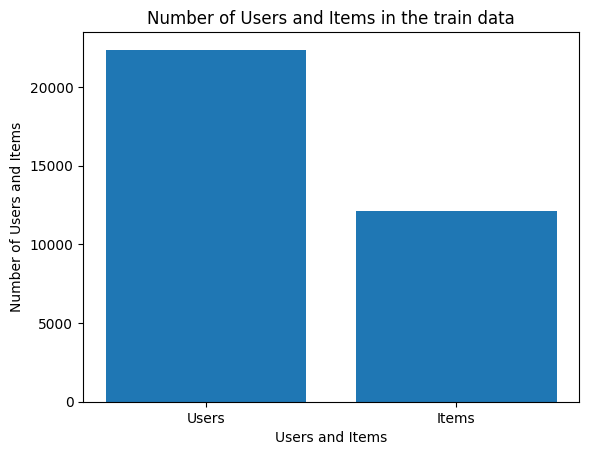

In [9]:
# And i also want to see the distribution of number of items rated by each user in the train data and number of users who rated each item in the train data
# I will plot the histogram for the above two distributions and x -axis i want to see  like 0,10,20,30,40,50,60,70,80,90,100 and y axis as number of users or items and i want some bg bars in the plot

def plot_user_item_distribution(user2item,item2user):
    user_item_dist = {}
    for user in user2item:
        num_items = len(user2item[user])
        if num_items not in user_item_dist:
            user_item_dist[num_items] = 0
        user_item_dist[num_items] += 1
    item_user_dist = {}
    for item in item2user:
        num_users = len(item2user[item])
        if num_users not in item_user_dist:
            item_user_dist[num_users] = 0
        item_user_dist[num_users] += 1
    x = list(user_item_dist.keys())
    y = [user_item_dist[num_items] for num_items in x]
    plt.bar(x,y)
    plt.xlabel('Number of items rated by user')
    plt.ylabel('Number of users')
    plt.show()
    x = list(item_user_dist.keys())
    y = [item_user_dist[num_users] for num_users in x]
    plt.bar(x,y)
    plt.xlabel('Number of users who rated item')
    plt.ylabel('Number of items')
    plt.show()

plot_user_item_distribution(user2item_train,item2user_train)


# I also want to see noof users and noof items in the train data

num_users_train = len(user2item_train)
num_items_train = len(item2user_train)
#Now plot a bar graph with x axis as noof users and noof items and y axis as noof users and noof items and name the x axis as users and items and y axis as noof users and noof items respectively and also name the title as noof users and noof items in the train data

plt.bar(['Users','Items'],[num_users_train,num_items_train])
plt.xlabel('Users and Items')
plt.ylabel('Number of Users and Items')
plt.title('Number of Users and Items in the train data')
plt.show()



## Data analysis about the minimum sequence length and maximum sequence length and average sequence length

In [10]:
sequential_data = load_text(os.path.join(data_dir,'beauty/sequential_data.txt'))
# print(sequential_data)

# Now in every line first element is the user and the rest are the items
# check the minimum sequence length and maximum sequence length
# check the average sequence length
min_seq_len = 100000
max_seq_len = 0
total_seq_len = 0
count = 0
for line in sequential_data.split('\n'):
    items = line.split(' ')
    seq_len = len(items) - 1
    if seq_len < min_seq_len:
        min_seq_len = seq_len
    if seq_len > max_seq_len:
        max_seq_len = seq_len
    total_seq_len += seq_len
    count += 1
    
print(f"Min Seq Len: {min_seq_len}, Max Seq Len: {max_seq_len}, Avg Seq Len: {total_seq_len/count}")

Min Seq Len: 0, Max Seq Len: 204, Avg Seq Len: 8.875961366481846
